In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# C:\Users\mahee\OneDrive\Desktop\sih6\input
import os
for dirname, _, filenames in os.walk('/content/sample_data/new'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# from google.colab import drive
# drive.mount('/https://drive.google.com/drive/folders/1ko6ZaqiyjX5gO2vUl6lc2M-uSL9mlHTg?usp=sharing/')

/content/sample_data/new/train/chapati/61203720.jpg
/content/sample_data/new/train/chapati/Chapati.jpg
/content/sample_data/new/train/chapati/roti-5599560__340.jpg
/content/sample_data/new/train/Dal_rice/dal rice.jpg
/content/sample_data/new/train/Dal_rice/download.jpg
/content/sample_data/new/train/Dal_rice/gettyimages-51948543-612x612.jpg
/content/sample_data/new/train/Khichdi/khicidi-1548939785.jpg
/content/sample_data/new/train/Khichdi/depositphotos_58570555-stock-photo-khichdi-rice-and-mung-bean.jpg
/content/sample_data/new/train/Khichdi/Maha-junk-food-ban-l.jpg
/content/sample_data/new/validation/chapati/61203720.jpg
/content/sample_data/new/validation/chapati/Chapati.jpg
/content/sample_data/new/validation/chapati/roti-5599560__340.jpg
/content/sample_data/new/validation/Dal_rice/dal rice.jpg
/content/sample_data/new/validation/Dal_rice/download.jpg
/content/sample_data/new/validation/Dal_rice/gettyimages-51948543-612x612.jpg
/content/sample_data/new/validation/Khichdi/khicidi-1

In [15]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.8.2


In [16]:
# Create a list with the filepaths for training and testing
train_dir = Path('/content/sample_data/new/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [17]:
test_dir = Path('/content/sample_data/new/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [18]:
val_dir = Path('/content/sample_data/new/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [19]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [20]:
import sys
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [21]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 9

Number of different labels: 3

Labels: ['Khichdi' 'Dal_rice' 'chapati']


In [22]:
train_df.head(9)

,Filepath,Label
0,/content/sample_data/new/train/Khichdi/Maha-ju...,Khichdi
1,/content/sample_data/new/train/Khichdi/deposit...,Khichdi
2,/content/sample_data/new/train/Dal_rice/dal ri...,Dal_rice
3,/content/sample_data/new/train/chapati/6120372...,chapati
4,/content/sample_data/new/train/Dal_rice/gettyi...,Dal_rice
5,/content/sample_data/new/train/Khichdi/khicidi...,Khichdi
6,/content/sample_data/new/train/chapati/roti-55...,chapati
7,/content/sample_data/new/train/Dal_rice/downlo...,Dal_rice
8,/content/sample_data/new/train/chapati/Chapati...,chapati


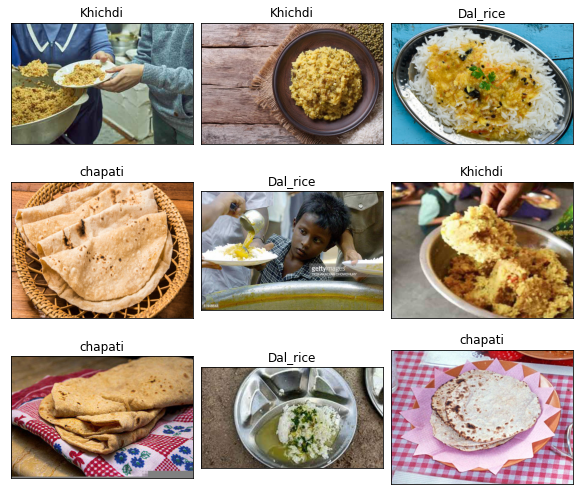

In [24]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
      ax.imshow(plt.imread(df_unique.Filepath[i]))
      ax.set_title(df_unique.Label[i], fontsize = 12)

plt.tight_layout(pad=0.5)
plt.show()

In [25]:
df_unique

,index,Filepath,Label
0,0,/content/sample_data/new/train/Khichdi/Maha-ju...,Khichdi
1,1,/content/sample_data/new/train/Khichdi/deposit...,Khichdi
2,2,/content/sample_data/new/train/Dal_rice/dal ri...,Dal_rice
3,3,/content/sample_data/new/train/chapati/6120372...,chapati
4,4,/content/sample_data/new/train/Dal_rice/gettyi...,Dal_rice
5,5,/content/sample_data/new/train/Khichdi/khicidi...,Khichdi
6,6,/content/sample_data/new/train/chapati/roti-55...,chapati
7,7,/content/sample_data/new/train/Dal_rice/downlo...,Dal_rice
8,8,/content/sample_data/new/train/chapati/Chapati...,chapati


In [26]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [27]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 9 validated image filenames belonging to 3 classes.


In [28]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 9 validated image filenames belonging to 3 classes.


In [29]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 9 validated image filenames belonging to 3 classes.


In [30]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [37]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
            )])

Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 1.4426 - accuracy: 0.3333 - val_loss: 0.6680 - val_accuracy: 0.8889
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.6680 - accuracy: 0.8889 - val_loss: 0.3359 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 1s 775ms/step - loss: 0.3359 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 792ms/step - loss: 0.1631 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 821ms/step - loss: 0.0795 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 1.0000


In [38]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

['Khichdi',
 'chapati',
 'Khichdi',
 'Dal_rice',
 'chapati',
 'Dal_rice',
 'Khichdi',
 'Dal_rice',
 'chapati']

In [39]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [41]:
img = output('/content/sample_data/new/test/Dal_rice/dal rice.jpg')
img

'Dal_rice'

In [42]:
model.save('FV.h5')